In [155]:
import os, pdb
from glob import glob
import numpy as np
import pandas as pd
from astropy.table import Table
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [156]:
sns.set(context='notebook', font_scale=1.8, style='whitegrid')
%matplotlib inline

### Plot my research rank

In [157]:
data = Table.read('data.csv')
data

world_rank,national_rank,Dindex,citations,publications,c21basic,name,institution,carnegie
int64,int64,int64,int64,int64,int64,str28,str64,str79
1,1,269,323475,1284,15,Donald P. Schneider,Pennsylvania State University,Doctoral Universities: Very High Research Activity
2,2,252,394160,1525,27,Michael A. Strauss,University of Oklahoma,Special Focus Four-Year: Research Institutions
3,3,251,413256,2368,-2,Joel Nathan Butler,Fermilab,"Not applicable, not in Carnegie universe (not accredited or nondegree-granting)"
4,4,223,309377,1789,15,J. E. Brau,University of Oregon,Doctoral Universities: Very High Research Activity
6,5,221,269231,1817,15,Guenakh Mitselmakher,University of Florida,Doctoral Universities: Very High Research Activity
9,6,214,284897,1376,15,Andrew White,The University of Texas at Arlington,Doctoral Universities: Very High Research Activity
12,7,209,246159,393,-2,Edward Witten,Institute for Advanced Study,"Not applicable, not in Carnegie universe (not accredited or nondegree-granting)"
...,...,...,...,...,...,...,...,...
1981,994,83,25446,213,15,Barry Zuckerman,Boston University,Doctoral Universities: Very High Research Activity


In [158]:
data[782]

world_rank,national_rank,Dindex,citations,publications,c21basic,name,institution,carnegie
int64,int64,int64,int64,int64,int64,str28,str64,str79
1524,774,91,32866,235,20,John Moustakas,Siena College,Master's Colleges & Universities: Small Programs


In [159]:
I = (np.logical_or(data['c21basic'] < 15, data['c21basic'] > 17)) * (data['c21basic'] != 27) * (data['c21basic'] != -2)
D = data[I]
print(set(D['carnegie']))
D

{"Master's Colleges & Universities: Small Programs", "Associate's Colleges: Mixed Transfer/Career & Technical-High Nontraditional", 'Baccalaureate Colleges: Arts & Sciences Focus', "Master's Colleges & Universities: Larger Programs"}


world_rank,national_rank,Dindex,citations,publications,c21basic,name,institution,carnegie
int64,int64,int64,int64,int64,int64,str28,str64,str79
713,382,111,90378,279,18,L. R. Cominsky,Sonoma State University,Master's Colleges & Universities: Larger Programs
794,422,108,37868,382,21,Jørgen André Lien,The University of the South,Baccalaureate Colleges: Arts & Sciences Focus
1289,687,95,49620,233,18,Kevin R. Covey,Western Washington University,Master's Colleges & Universities: Larger Programs
1480,767,91,35658,1235,18,Anjan Biswas,Alabama A & M University,Master's Colleges & Universities: Larger Programs
1523,776,91,79281,136,21,Daniel E. Vanden Berk,Saint Vincent College,Baccalaureate Colleges: Arts & Sciences Focus
1524,774,91,32866,235,20,John Moustakas,Siena College,Master's Colleges & Universities: Small Programs
1591,814,89,46812,228,21,Karen L. Masters,Haverford College,Baccalaureate Colleges: Arts & Sciences Focus
1826,918,86,32223,219,21,Dale D. Kocevski,Colby College,Baccalaureate Colleges: Arts & Sciences Focus
1845,935,85,47691,152,6,Hee-Jong Seo,Ohio University-Lancaster,Associate's Colleges: Mixed Transfer/Career & Technical-High Nontraditional


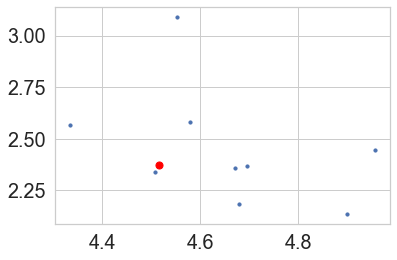

In [160]:
plt.scatter(np.log10(D['citations']), np.log10(D['publications']), s=10)
plt.scatter(np.log10(data['citations'][782]), np.log10(data['publications'][782]), s=50, color='red')

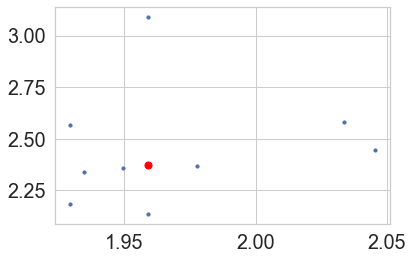

In [161]:
plt.scatter(np.log10(D['Dindex']), np.log10(D['publications']), s=10)
plt.scatter(np.log10(data['Dindex'][782]), np.log10(data['publications'][782]), s=50, color='red')

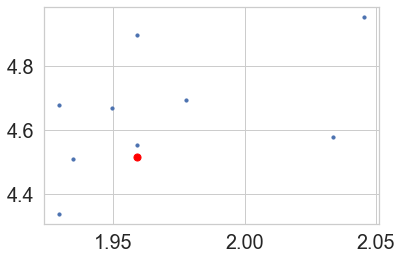

In [162]:
plt.scatter(np.log10(D['Dindex']), np.log10(D['citations']), s=10)
plt.scatter(np.log10(data['Dindex'][782]), np.log10(data['citations'][782]), s=50, color='red')

In [163]:
#fig, (ax1, ax2) = plt.subplots(1, 2)
#ax.plot(

### Generate student evaluations vs time

In [190]:
def read_report(verbose=False):
    csvfile = 'Multiple_Year_Reporting_For_John_Moustakas_Custom.csv'
    df = pd.read_csv(csvfile)#, usecols=['subj', 'ENROLL', 'fees', 'TYPE', 'INST_METHOD', 'CRN'])
    if verbose:
        print(df.columns)

    semester = [0.0 if sem == 'Fall' else -0.5 for sem in df['Semester'].values]
    #semester = ['30' if sem == 'Fall' else '40' for sem in df['Semester'].values]
    #df['date'] = [str(yr) + sem for yr, sem in zip(df['Year'], semester)]
    df['date'] = [int(yr) + sem for yr, sem in zip(df['Year'], semester)]

    #df = df.sort_values(by='date')#, inplace=True)
    #print(df['date'].min(), df['date'].max())

    # renormalize the columns capped at 7 to have a max of 10
    for col in [
        'Instructor availability',
        'Instructor communicated clearly',
        'Instructor enthusiastic about subject',
        'Student prepared for class',
        'Instructor created respectful atmosphere',
        'Instructor gave useful feedback',
        'Student challenged to do best work',
        'Completed assigned work before class',
        'Instructor available outside class',
        'Sought instructor help when needed',
        'Contributed to class discussions',
        'Critical/creative thinking improved',
        'Able to integrate information/make reasoned judgements',
        'Research skills further developed',
        'Course allowed exploration/application of scientific method',
        'Improved ability to form hypotheses/make reasoned judgements',
        'Better able to apply quantitative skills',
        'Can employ concepts of skepticism/empiricism',
        'Enhanced ability to read/comprehend texts',
        'More confident in communication skills',
        'Improved listening ability',
        'Course allowed exploration of diversity/inclusion',
        'Understand duty to affirm rights of others',
        'Course allowed exploration of traditions in history',
        'Can identify own traditions w/ others when presenting a position',
        'Self-awareness of biases toward others',
        'Can show how traditions address fundamental humanistic/religious questions',
        'Course allowed exploration of social justice concepts',
        'Can apply social justice principles to learn extent they are unrealized',
        'Can recognize underlying factors in social injustice']:
        df[col] = df[col] * 10.0 / 7.0 

    # renormalize the columns capped at 4 to have a max of 10
    for col in [
        'Worked with other students',
        'Thought about concepts',
        'Received prompt feedback',
        'Course challenged you',
        'Able to analyze subject']:
        df[col] = df[col] * 10.0 / 4.0     
    
    df['enthusiasm'] = df[['Enthusiasm for subject', 'Instructor enthusiastic about subject']].mean(axis=1)
    df['available'] = df[['Instructor availability', 'Instructor available outside class']].mean(axis=1)
    
    df['term'] = df['Semester'] + df['Year'].astype(str)

    return df

df = read_report(verbose=True)
df

Index(['Year', 'Semester', 'Dept', 'Num', 'Section', 'Trait', 'Course Name',
       'Type', 'Possible Respondents', 'Num Respondents', 'Response Rate %',
       'Classes helpful', 'Course material organized',
       'Enthusiasm for subject', 'Instructor prepared', 'Classes interesting',
       'Material corresponded to objectives', 'Assignments helpful',
       'Knowledge of subject', 'Instructor approachable',
       'Worked with other students', 'Thought about concepts',
       'Instructor rating', 'Exams represent course content', 'Course rating',
       'Instructor cares', 'Received prompt feedback', 'Course challenged you',
       'Able to analyze subject', 'Instructor availability',
       'Explanations of complex concepts', 'Encourage critical thought',
       'Instructor communicated clearly',
       'Instructor enthusiastic about subject', 'Student prepared for class',
       'Instructor created respectful atmosphere',
       'Instructor gave useful feedback', 'Student challen

,Year,Semester,Dept,Num,Section,Trait,Course Name,Type,Possible Respondents,Num Respondents,...,Can identify own traditions w/ others when presenting a position,Self-awareness of biases toward others,Can show how traditions address fundamental humanistic/religious questions,Course allowed exploration of social justice concepts,Can apply social justice principles to learn extent they are unrealized,Can recognize underlying factors in social injustice,date,enthusiasm,available,term
0,2022,Spring,PHYS,410,4,Non-Core,Electromagnetic Theory I,Lecture,10,9,...,NaN,NaN,NaN,NaN,NaN,NaN,2021.5,9.714286,9.428571,Spring2022
1,2021,Spring,PHYS,410,4,Non-Core,Electromagnetic Theory I,Lecture,16,15,...,NaN,NaN,NaN,NaN,NaN,NaN,2020.5,9.000000,8.285714,Spring2021
2,2021,Spring,PHYS,392,8,Non-Core,Principles of Astrophysics II,Lecture,3,3,...,NaN,NaN,NaN,NaN,NaN,NaN,2020.5,10.000000,9.571429,Spring2021
3,2021,Fall,PHYS,220,10H,Core,Modern Physics-Lab,Lab,8,8,...,8.285714,8.285714,8.285714,8.285714,8.285714,8.571429,2021.0,9.142857,9.285714,Fall2021
4,2021,Fall,PHYS,220,6,Core,Modern Physics,Lecture,20,20,...,7.571429,7.571429,7.571429,7.571429,7.428571,7.571429,2021.0,9.571429,9.285714,Fall2021
5,2021,Spring,ASTR,392,8,Non-Core,Principles of Astrophysics II,Lecture,7,7,...,NaN,NaN,NaN,NaN,NaN,NaN,2020.5,10.000000,9.000000,Spring2021
6,2020,Fall,PHYS,220,2,Core,Modern Physics,Lecture,23,18,...,7.000000,7.285714,7.000000,7.000000,7.000000,7.000000,2020.0,9.714286,9.428571,Fall2020
7,2020,Fall,ASTR,390,6,Non-Core,Principles of Astrophysics I,Lecture,7,7,...,NaN,NaN,NaN,NaN,NaN,NaN,2020.0,10.000000,9.285714,Fall2020
8,2020,Spring,ASTR,332,7,Non-Core,Astrophysics Seminar II,Seminar,5,4,...,NaN,NaN,NaN,NaN,NaN,NaN,2019.5,10.000000,9.714286,Spring2020
9,2019,Fall,PHYS,130,4,Core,FRESH: General Physics I,Lecture,23,13,...,7.142857,7.571429,7.142857,7.571429,7.142857,7.142857,2019.0,9.571429,9.285714,Fall2019


0 Classes helpful
[2012.  2012.5 2013.  2013.5 2014.  2014.5 2015.  2015.5 2016.  2016.5]


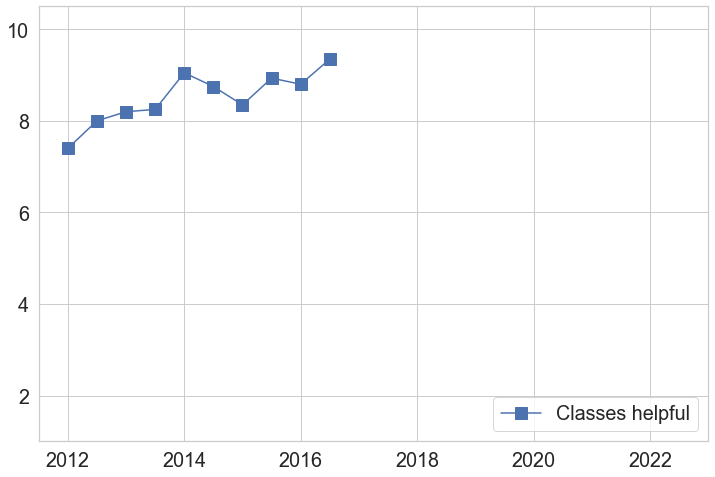

1 Course material organized
[2012.  2012.5 2013.  2013.5 2014.  2014.5 2015.  2015.5 2016.  2016.5]


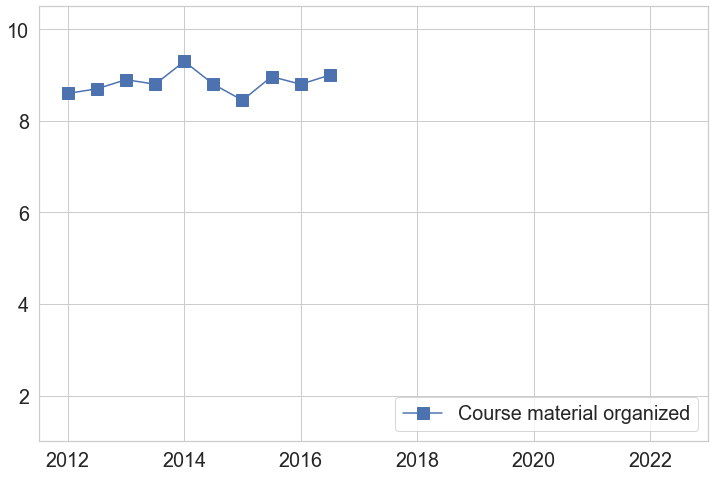

2 Enthusiasm for subject
[2012.  2012.5 2013.  2013.5 2014.  2014.5 2015.  2015.5 2016.  2016.5]


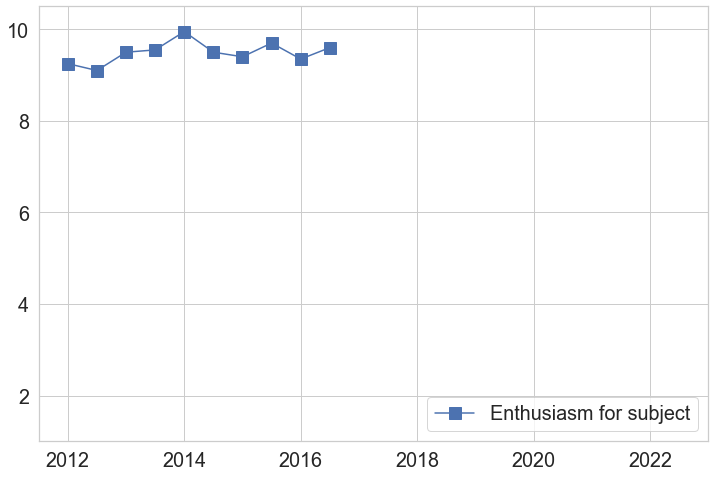

3 Instructor prepared
[2012.  2012.5 2013.  2013.5 2014.  2014.5 2015.  2015.5 2016.  2016.5]


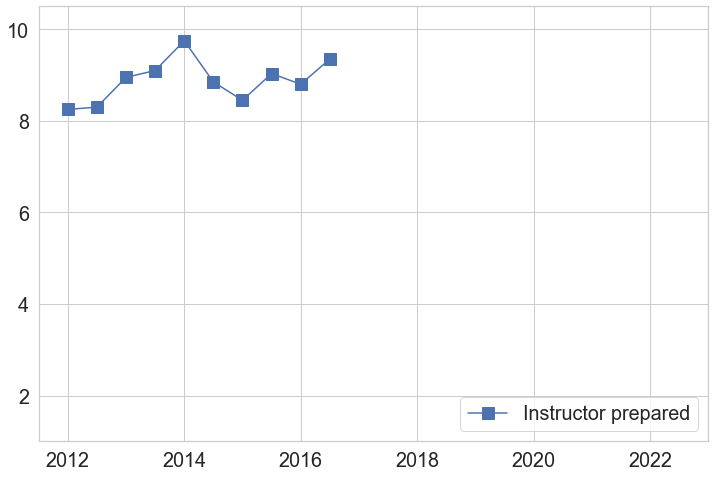

4 Classes interesting
[2012.  2012.5 2013.  2013.5 2014.  2014.5 2015.  2015.5 2016.  2016.5]


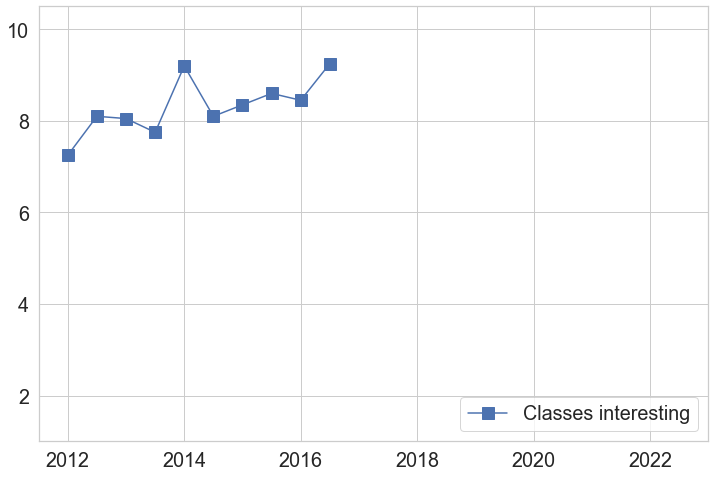

5 Material corresponded to objectives
[2012.  2012.5 2013.  2013.5 2014.  2014.5 2015.  2015.5 2016.  2016.5]


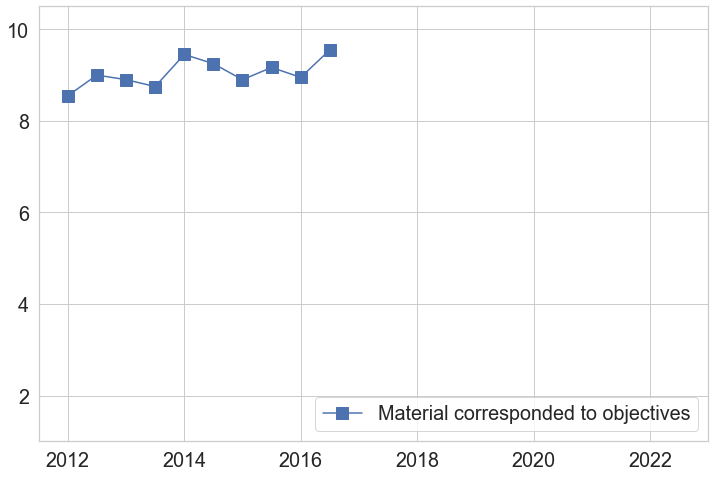

6 Assignments helpful
[2012.  2012.5 2013.  2013.5 2014.  2014.5 2015.  2015.5 2016.  2016.5]


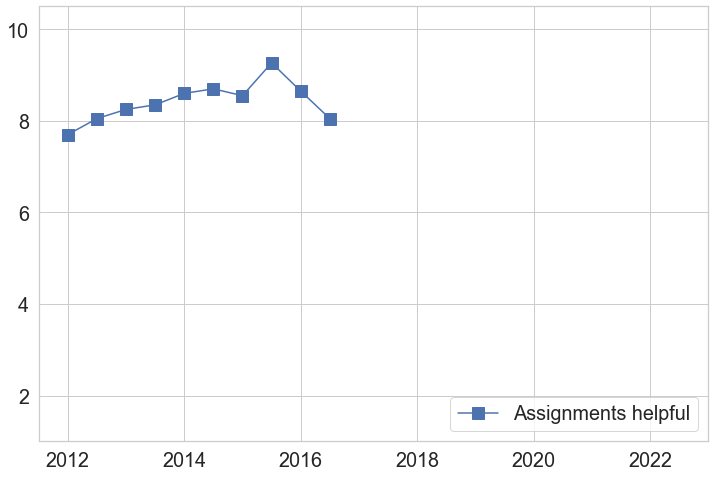

7 Knowledge of subject
[2012.  2012.5 2013.  2013.5 2014.  2014.5 2015.  2015.5 2016.  2016.5]


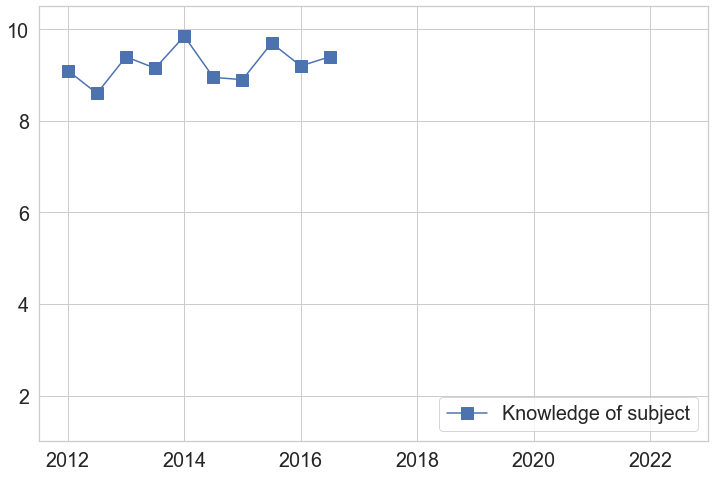

8 Instructor approachable
[2012.  2012.5 2013.  2013.5 2014.  2014.5 2015.  2015.5 2016.  2016.5]


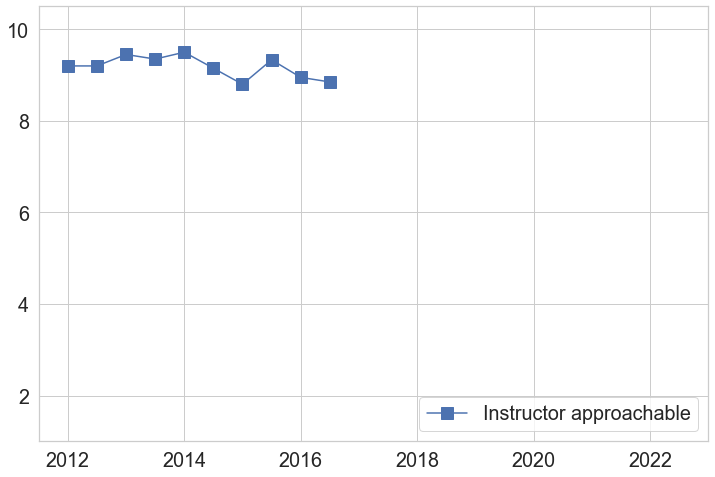

9 Worked with other students
[2012.  2012.5 2013.  2013.5 2014.  2014.5 2015.  2015.5 2016.  2016.5]


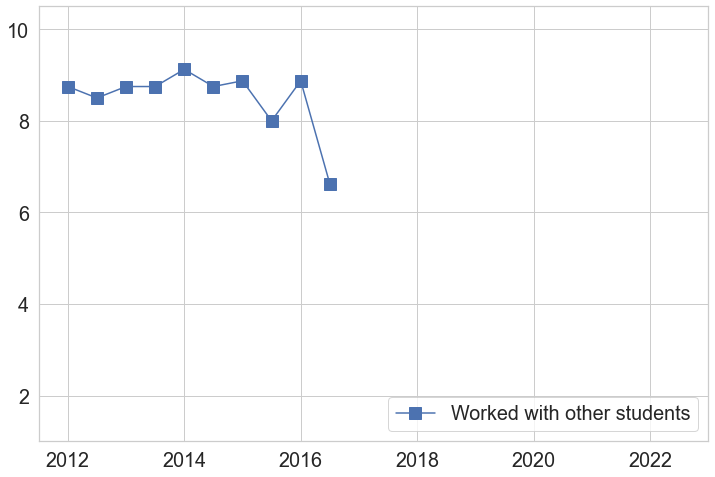

10 Thought about concepts
[2012.  2012.5 2013.  2013.5 2014.  2014.5 2015.  2015.5 2016.  2016.5]


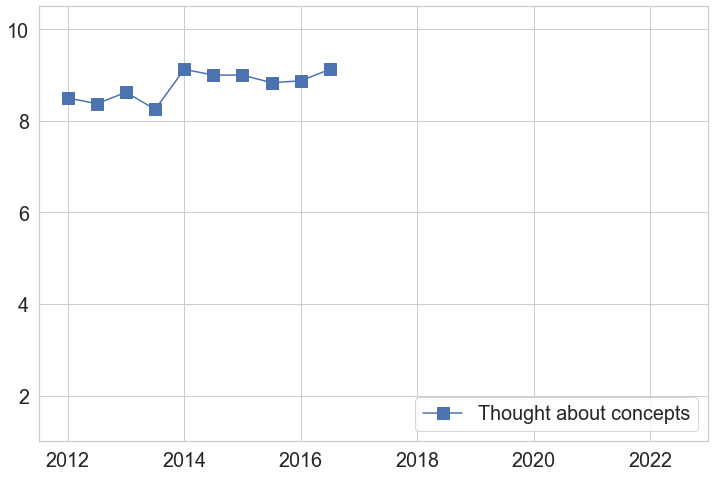

11 Instructor rating
[2012.  2012.5 2013.  2013.5 2014.  2014.5 2015.  2015.5 2016.  2016.5]


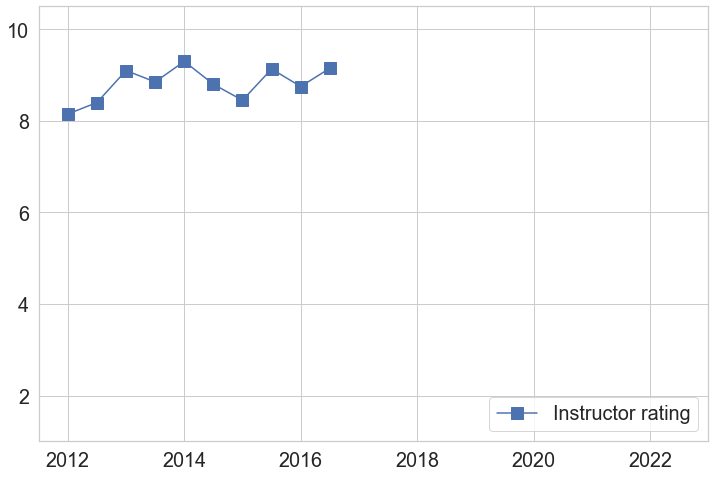

12 Exams represent course content
[2012.  2012.5 2013.  2013.5 2014.  2014.5 2015.  2015.5 2016.  2016.5]


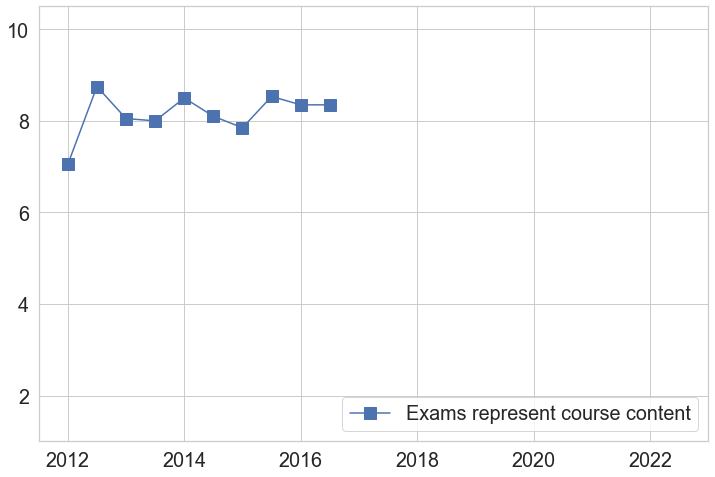

13 Course rating
[2012.  2012.5 2013.  2013.5 2014.  2014.5 2015.  2015.5 2016.  2016.5]


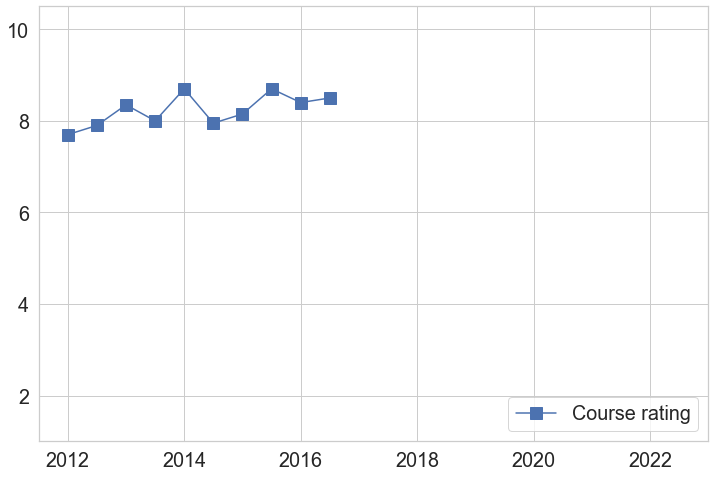

14 Instructor cares
[2012.  2012.5 2013.  2013.5 2014.  2014.5 2015.  2015.5 2016.  2016.5]


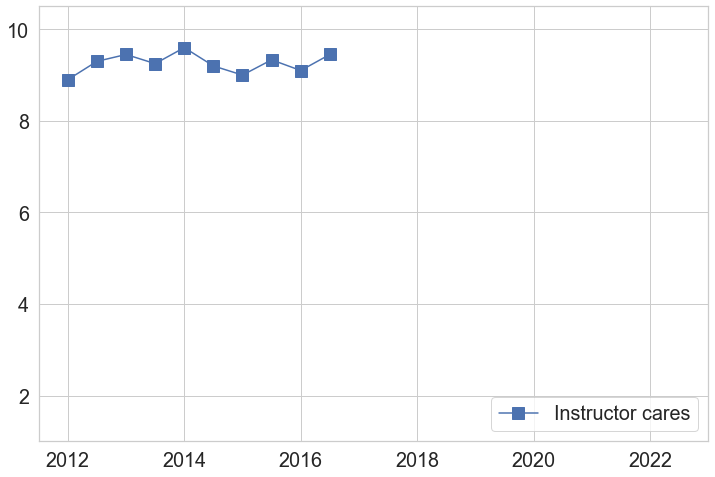

15 Received prompt feedback
[2012.  2012.5 2013.  2013.5 2014.  2014.5 2015.  2015.5 2016.  2016.5]


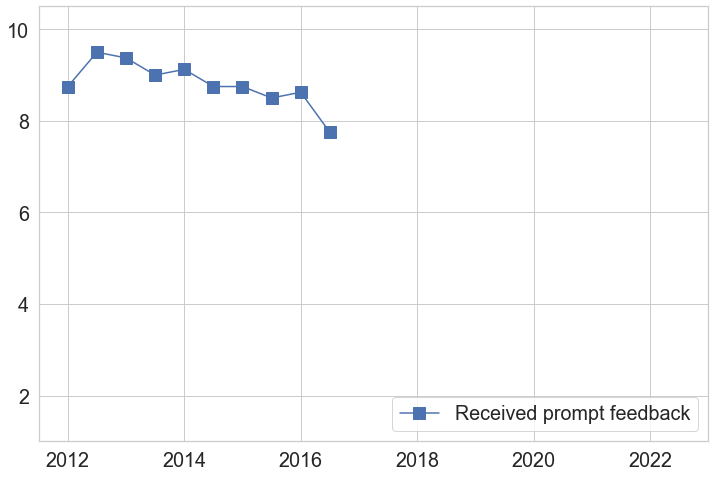

16 Course challenged you
[2012.  2012.5 2013.  2013.5 2014.  2014.5 2015.  2015.5 2016.  2016.5]


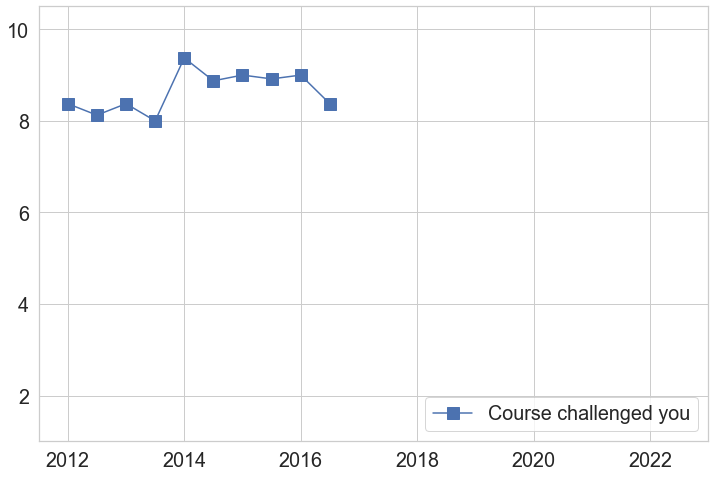

17 Able to analyze subject
[2012.  2012.5 2013.  2013.5 2014.  2014.5 2015.  2015.5 2016.  2016.5]


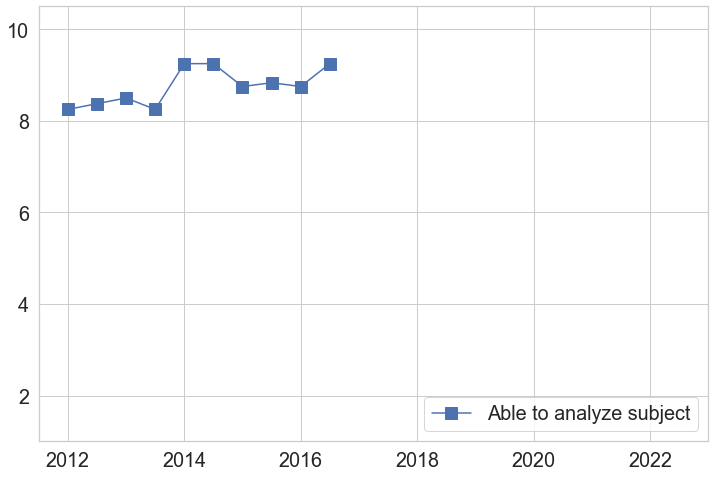

18 Instructor availability
[2012.  2012.5 2013.  2013.5 2014.  2014.5 2015.  2015.5 2016.  2016.5]


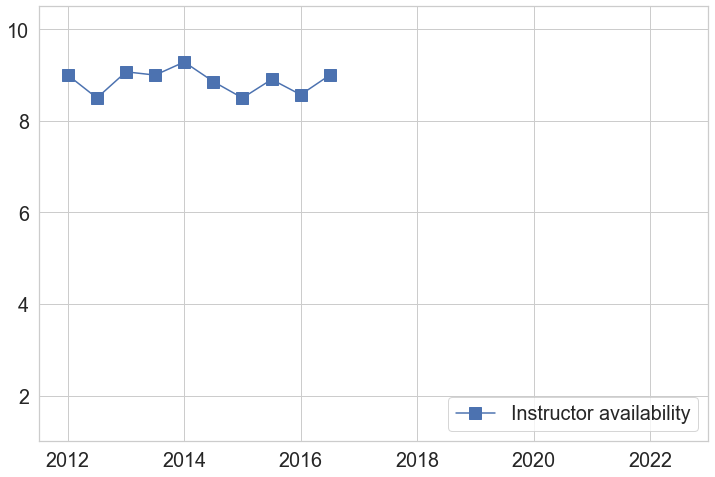

19 Explanations of complex concepts
[2012.  2012.5 2013.  2013.5 2014.  2014.5 2015.  2015.5 2016.  2016.5]


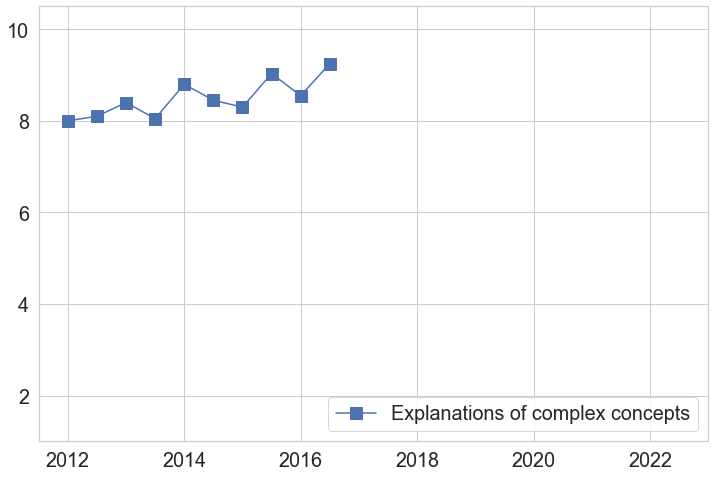

20 Encourage critical thought
[2012.  2012.5 2013.  2013.5 2014.  2014.5 2015.  2015.5 2016.  2016.5]


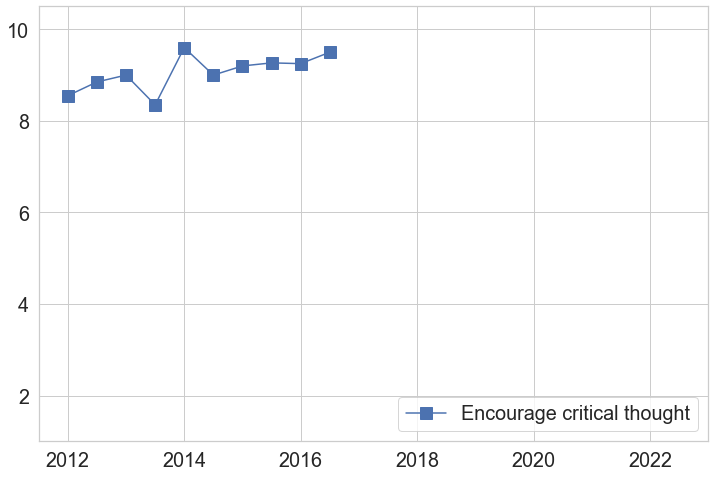

21 Instructor communicated clearly
[2016.5 2017.  2017.5 2019.  2019.5 2020.  2020.5 2021.  2021.5]


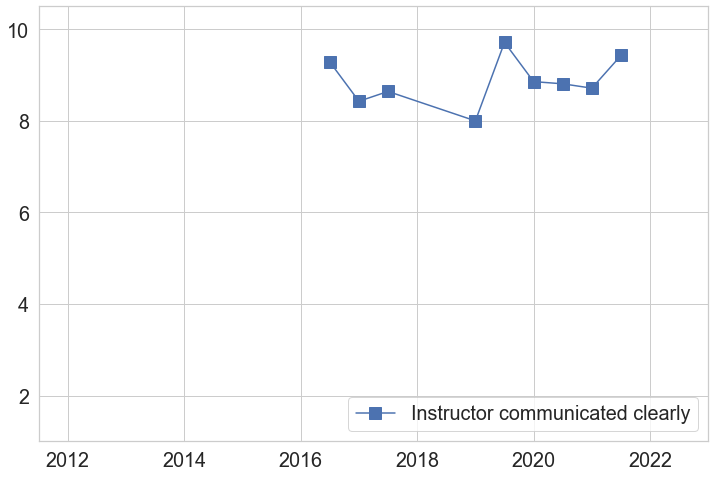

22 Instructor enthusiastic about subject
[2016.5 2017.  2017.5 2019.  2019.5 2020.  2020.5 2021.  2021.5]


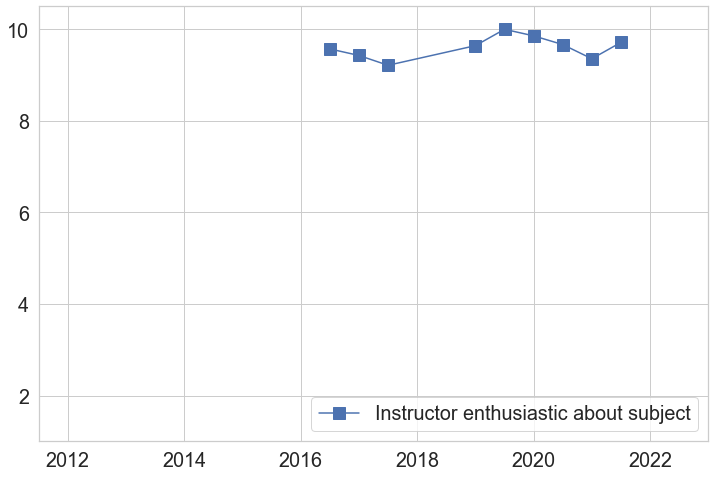

23 Student prepared for class
[2016.5 2017.  2017.5 2019.  2019.5 2020.  2020.5 2021.  2021.5]


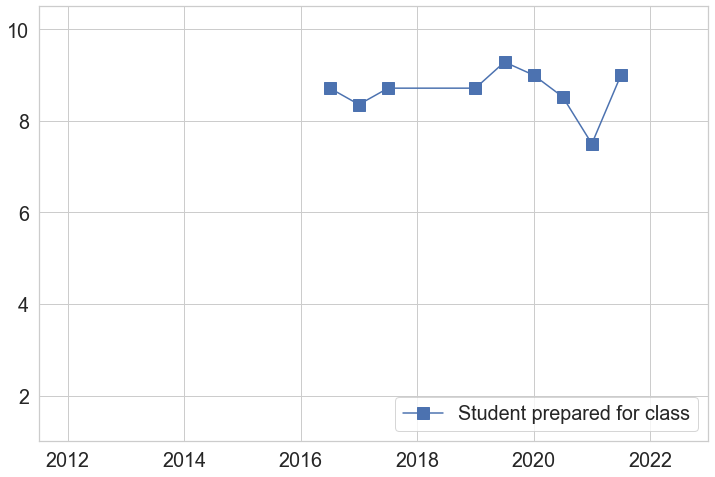

24 Instructor created respectful atmosphere
[2016.5 2017.  2017.5 2019.  2019.5 2020.  2020.5 2021.  2021.5]


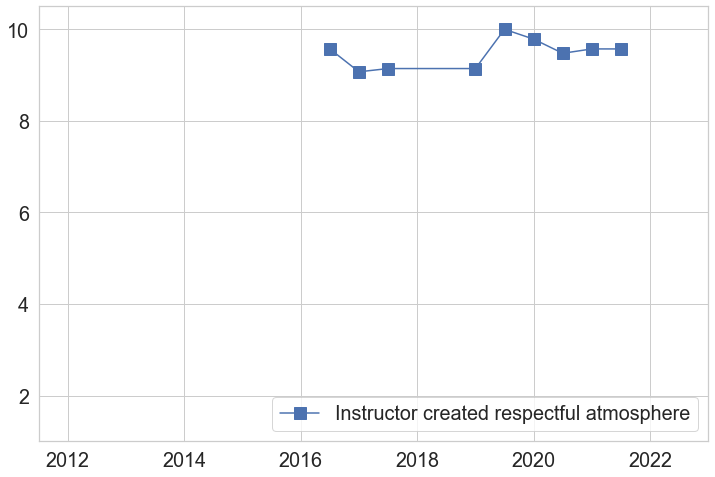

25 Instructor gave useful feedback
[2016.5 2017.  2017.5 2019.  2019.5 2020.  2020.5 2021.  2021.5]


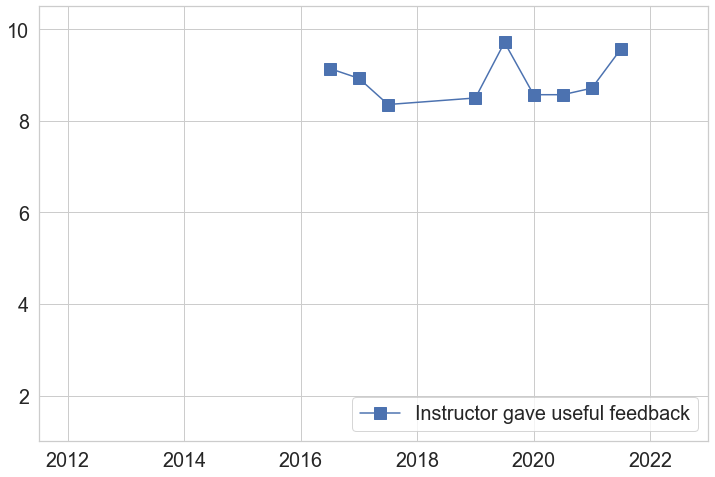

26 Student challenged to do best work
[2016.5 2017.  2017.5 2019.  2019.5 2020.  2020.5 2021.  2021.5]


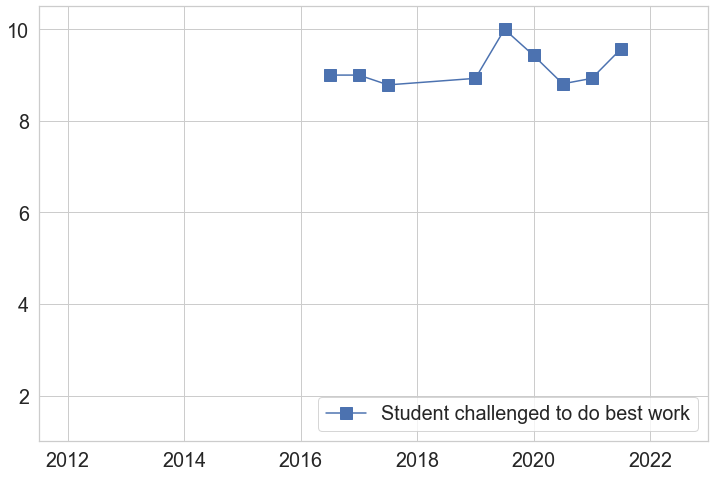

27 Completed assigned work before class
[2016.5 2017.  2017.5 2019.  2019.5 2020.  2020.5 2021.  2021.5]


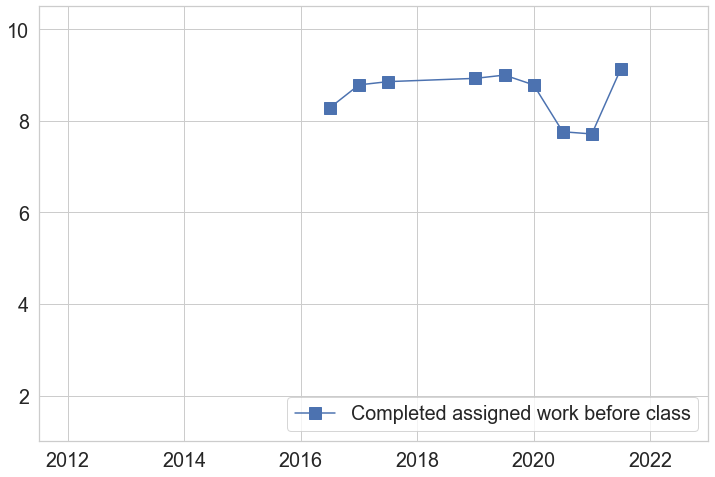

28 Instructor available outside class
[2016.5 2017.  2017.5 2019.  2019.5 2020.  2020.5 2021.  2021.5]


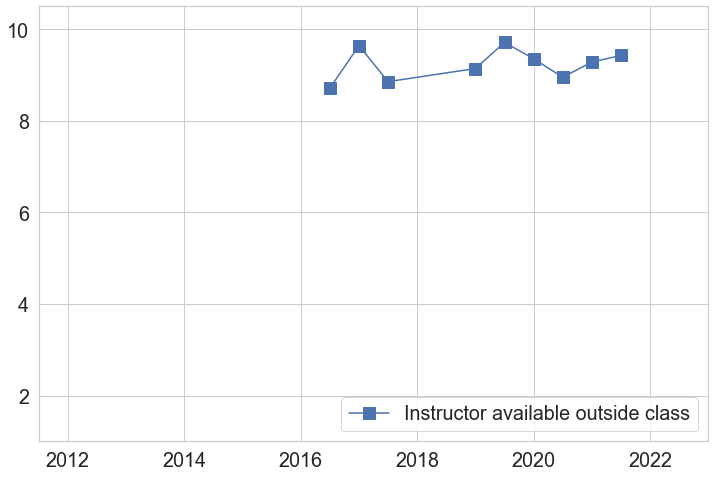

29 Sought instructor help when needed
[2016.5 2017.  2017.5 2019.  2019.5 2020.  2020.5 2021.  2021.5]


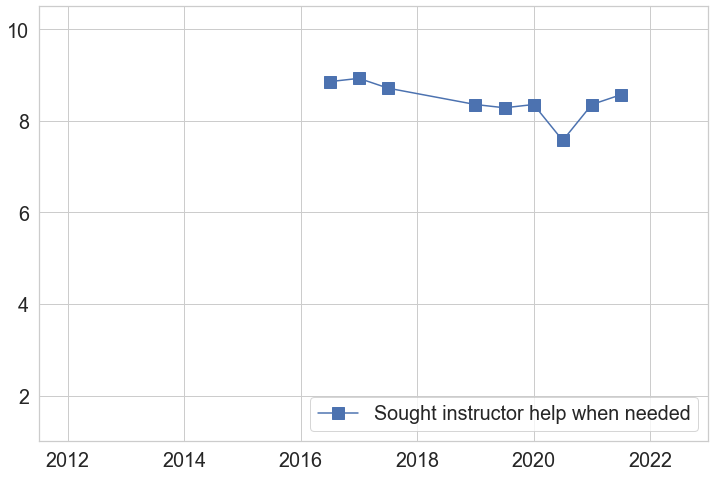

30 Contributed to class discussions
[2016.5 2017.  2017.5 2019.  2019.5 2020.  2020.5 2021.  2021.5]


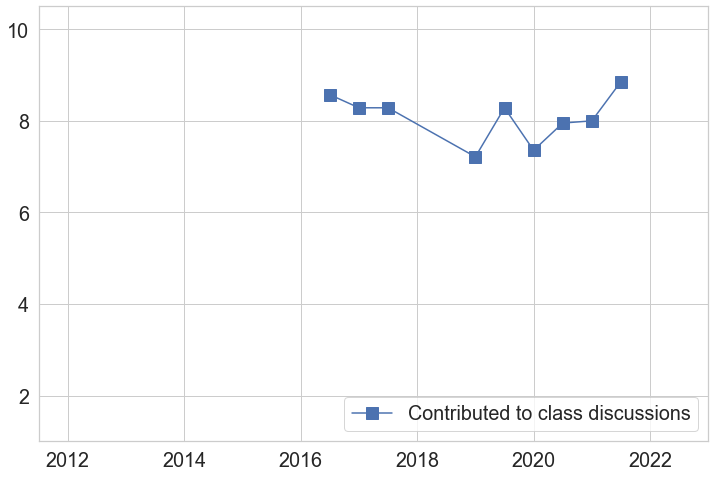

31 Critical/creative thinking improved
[2017.5 2019.  2020.  2021. ]


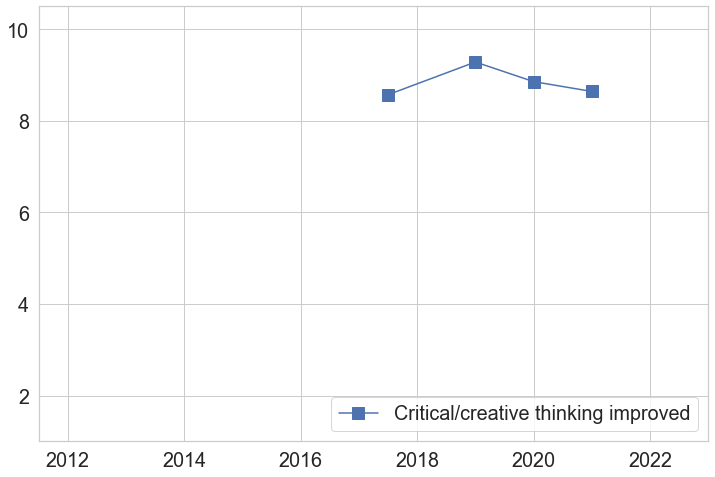

32 Able to integrate information/make reasoned judgements
[2017.5 2019.  2020.  2021. ]


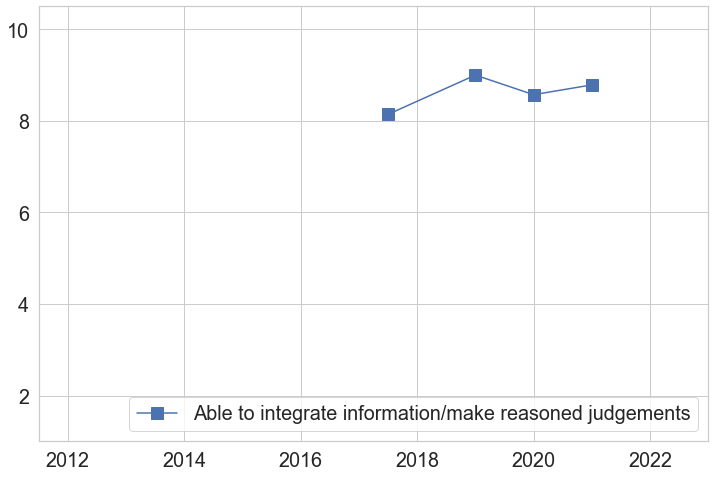

33 Research skills further developed
[2017.5 2019.  2020.  2021. ]


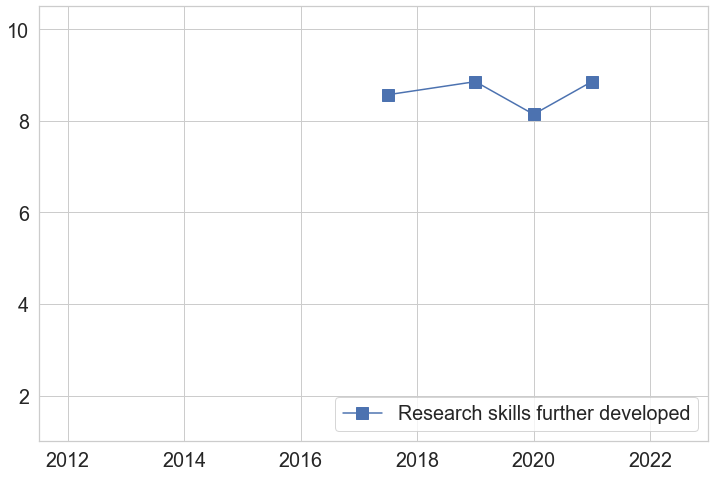

34 Improved ability to form hypotheses/make reasoned judgements
[2017.5 2019.  2020.  2021. ]


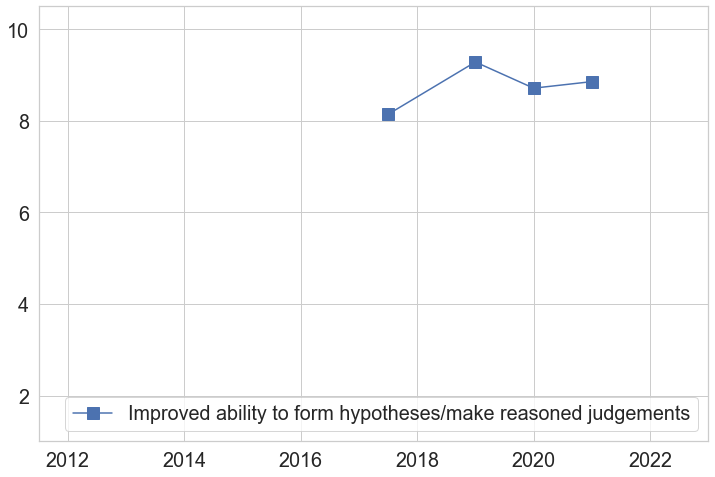

35 Better able to apply quantitative skills
[2017.5 2019.  2020.  2021. ]


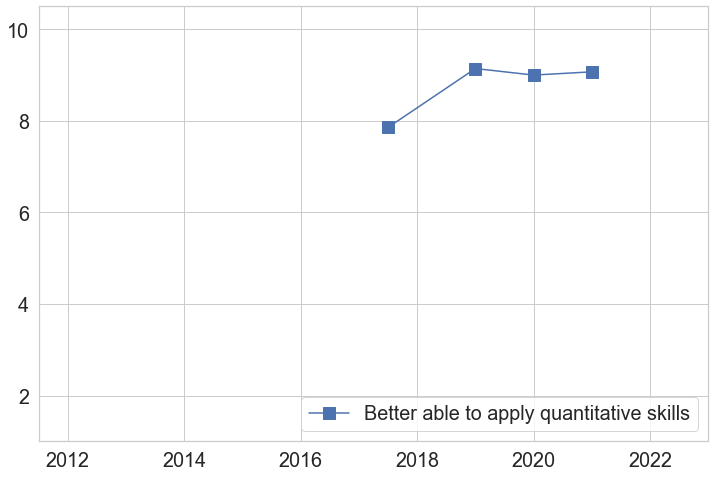

36 Can employ concepts of skepticism/empiricism
[2017.5 2019.  2020.  2021. ]


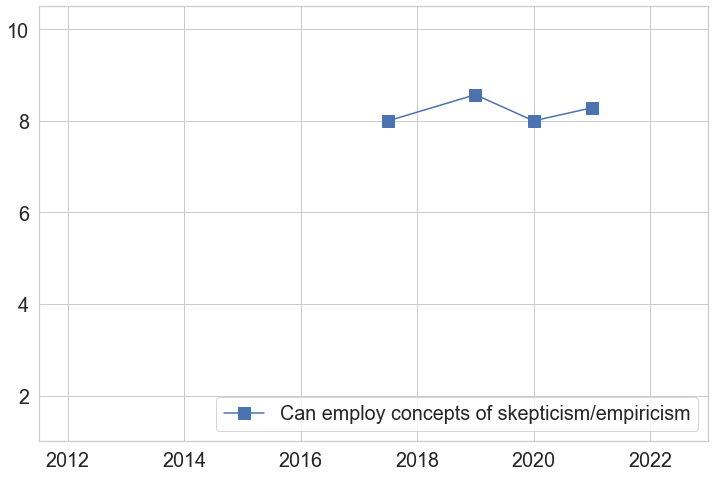

37 Course allowed exploration/application of scientific method
[2017.5 2019.  2020.  2021. ]


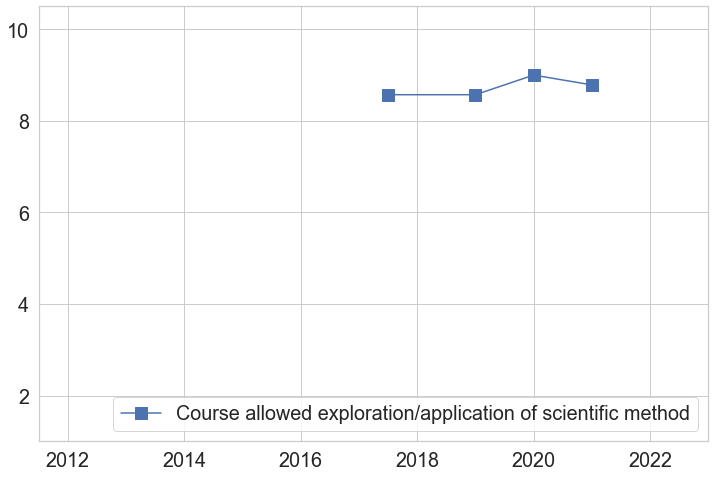

38 Enhanced ability to read/comprehend texts
[2017.5 2019.  2020.  2021. ]


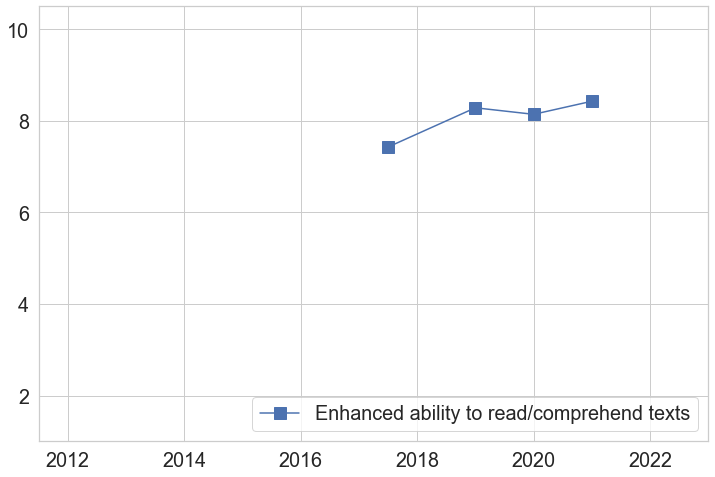

39 More confident in communication skills
[2017.5 2019.  2020.  2021. ]


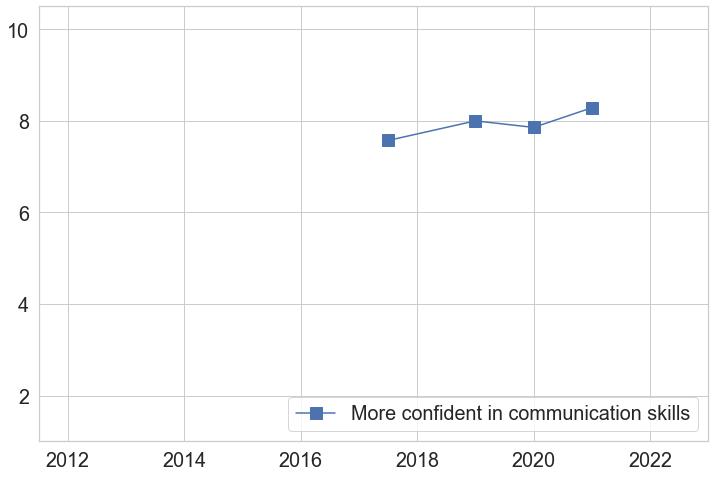

40 Improved listening ability
[2017.5 2019.  2020.  2021. ]


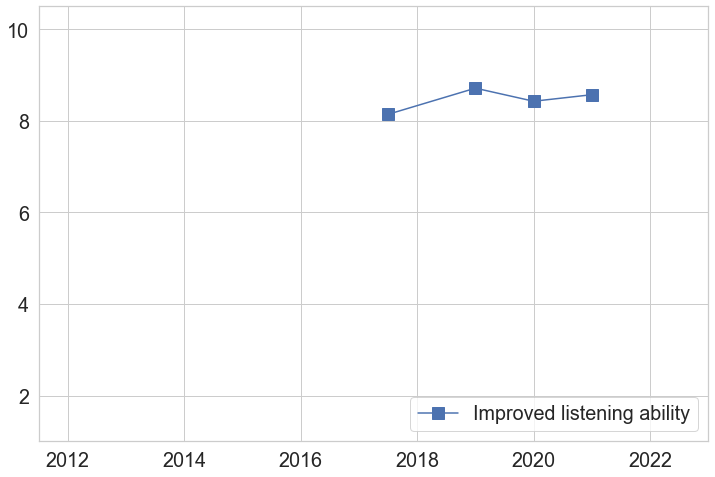

41 Appreciation of link between nature/effect of human involvement
[2017.5 2019.  2020.  2021. ]


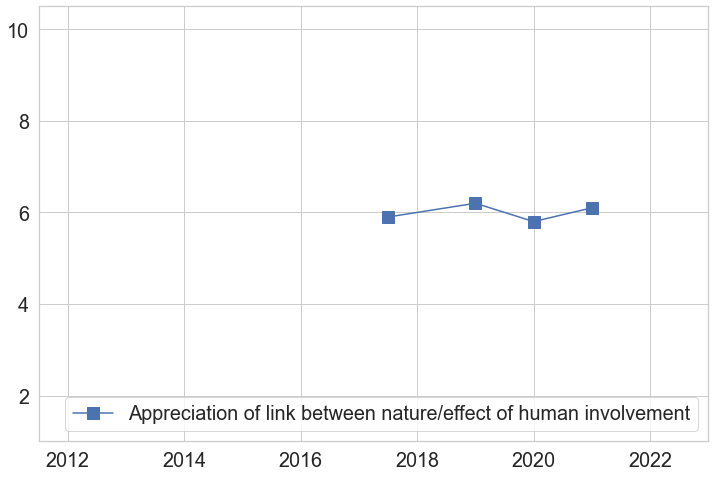

42 Able to communicate benefits of good stewardship
[2017.5 2019.  2020.  2021. ]


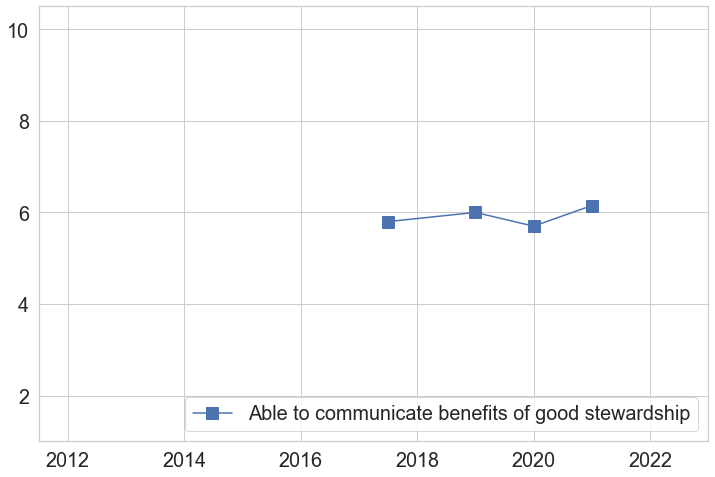

43 Laboratory, helpful
[2012.  2012.5 2013.  2013.5]


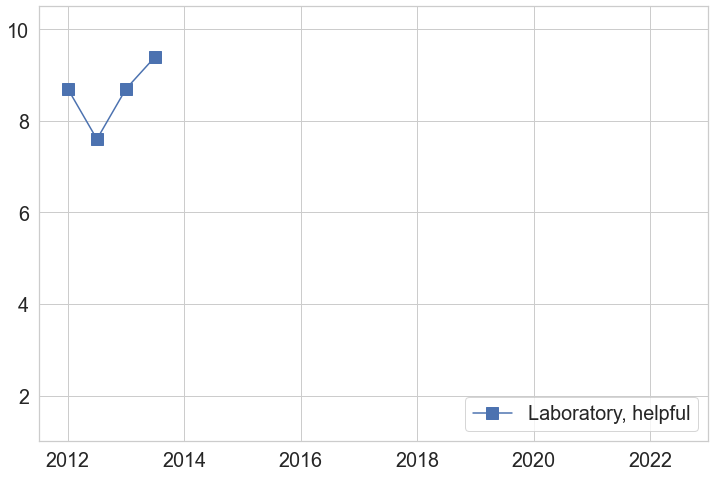

44 Lab complements Lec
[2012.  2012.5 2013.  2013.5]


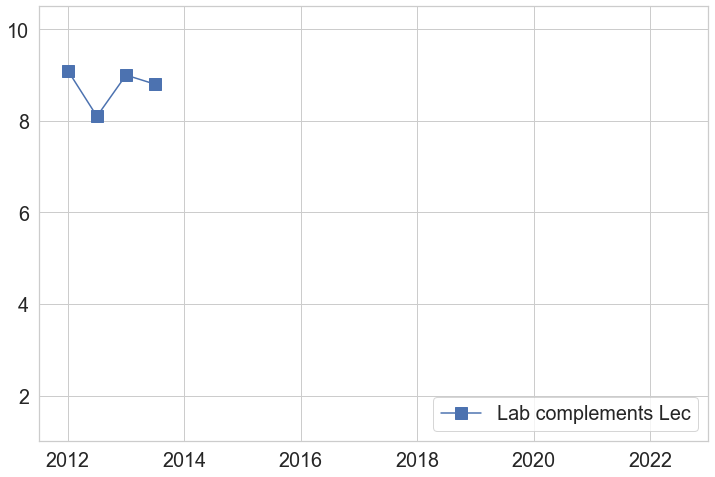

45 Lab illustrates scientific methodology
[2012.  2012.5 2013.  2013.5]


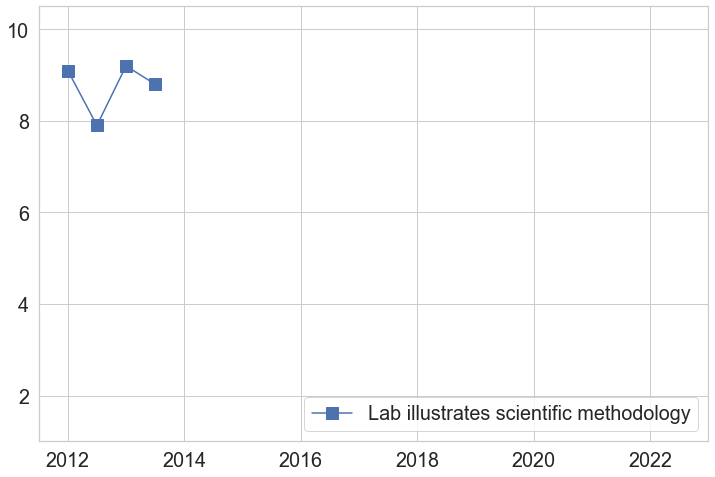

46 Understand Lab goals
[2012.  2012.5 2013.  2013.5]


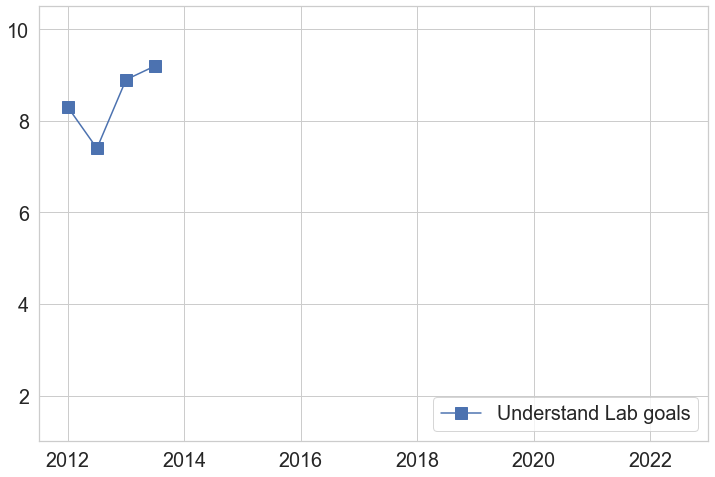

47 Lab added to understanding
[2012.  2012.5 2013.  2013.5]


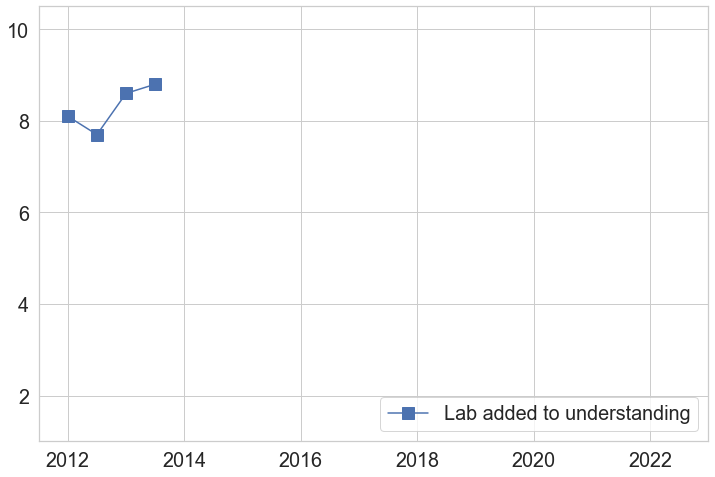

48 Gain skills from Lab
[2012.  2012.5 2013.  2013.5]


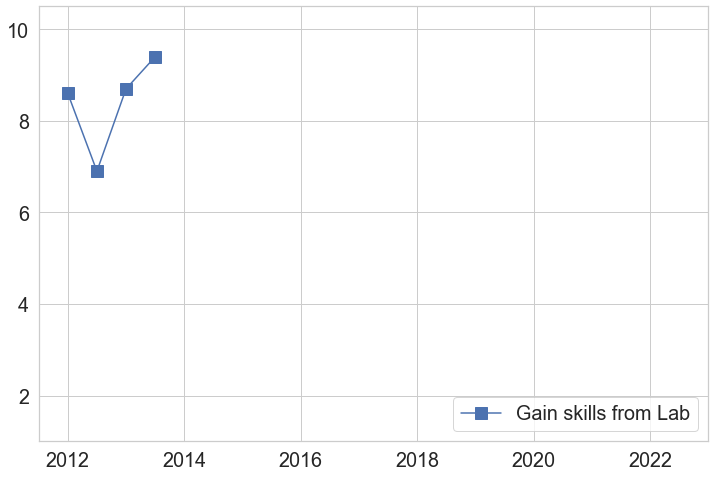

49 Lab caused questions
[2012.  2012.5 2013.  2013.5]


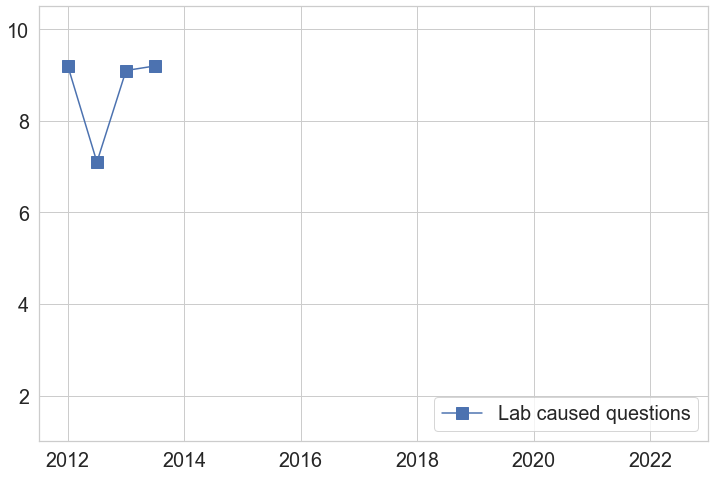

50 Lab, overall
[2012.  2012.5 2013.  2013.5]


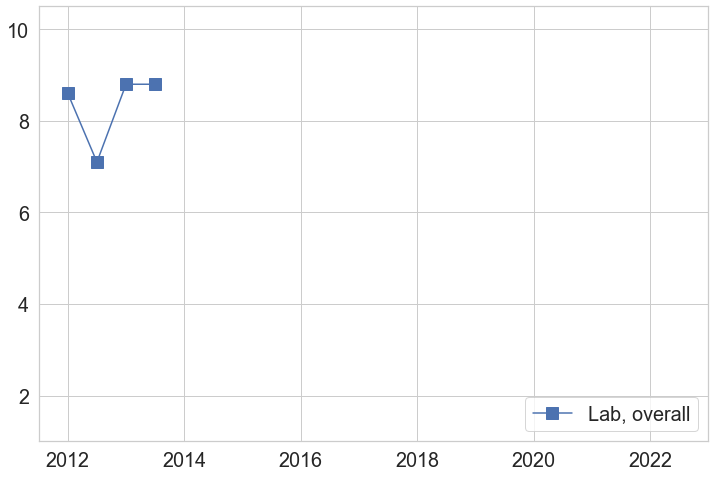

51 Lab instructions clear
[2012.  2012.5 2013.  2013.5]


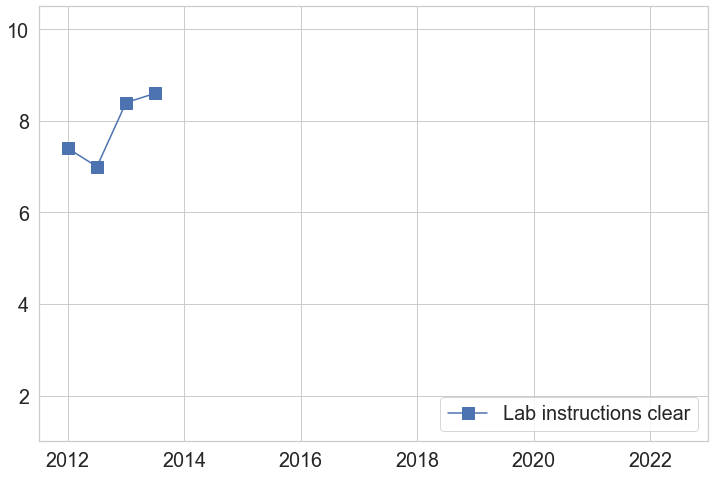

52 Course allowed exploration of diversity/inclusion
[2017.5 2019.  2020.  2021. ]


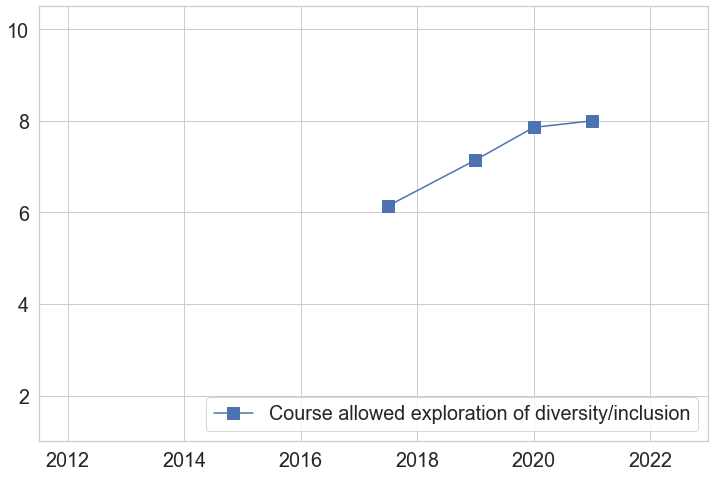

53 Understand duty to affirm rights of others
[2017.5 2019.  2020.  2021. ]


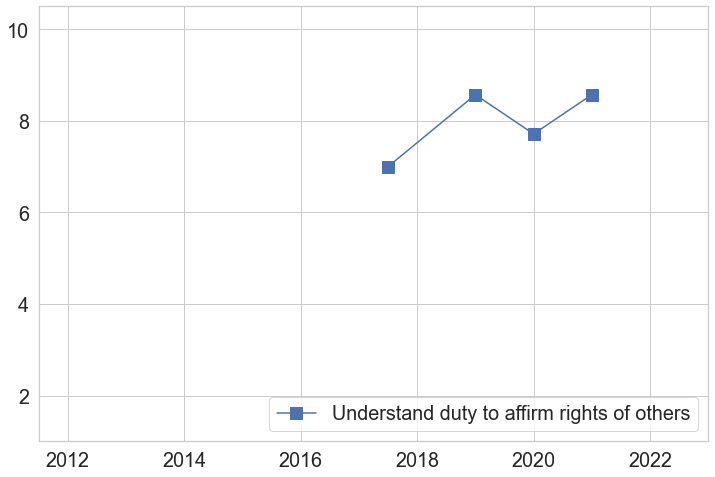

54 Course allowed exploration of traditions in history
[2017.5 2019.  2020.  2021. ]


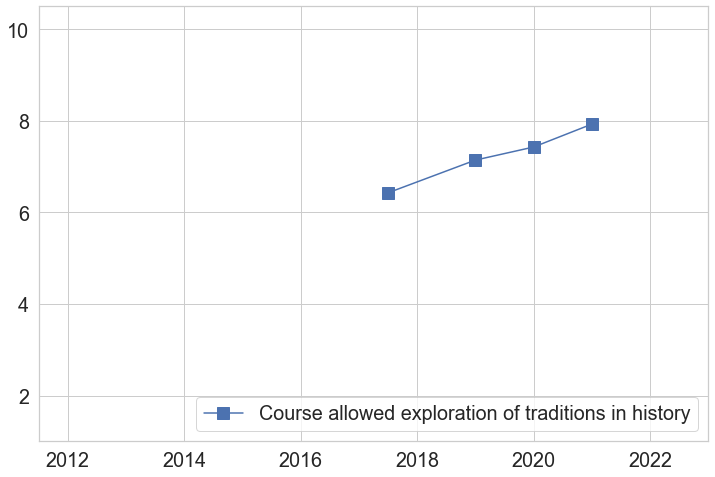

55 Can identify own traditions w/ others when presenting a position
[2017.5 2019.  2020.  2021. ]


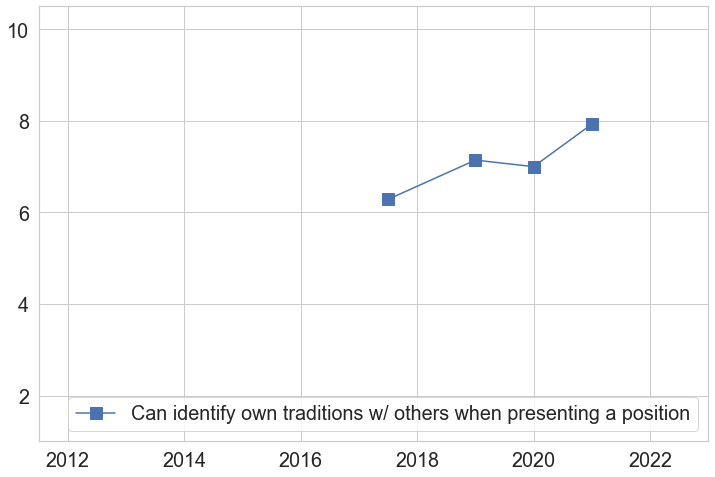

56 Self-awareness of biases toward others
[2017.5 2019.  2020.  2021. ]


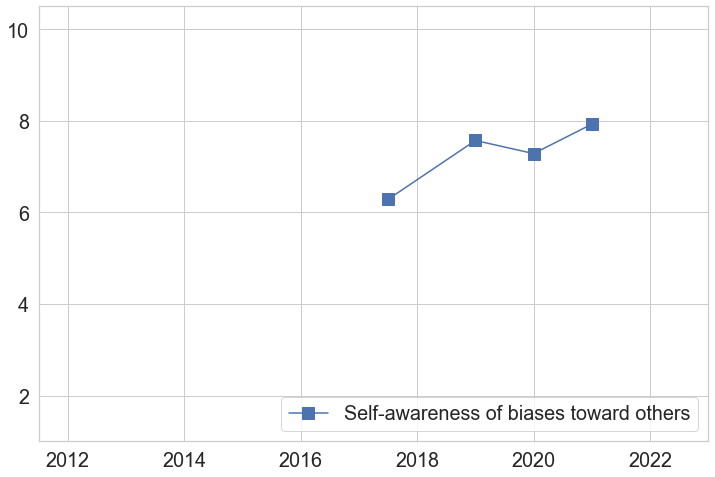

57 Can show how traditions address fundamental humanistic/religious questions
[2017.5 2019.  2020.  2021. ]


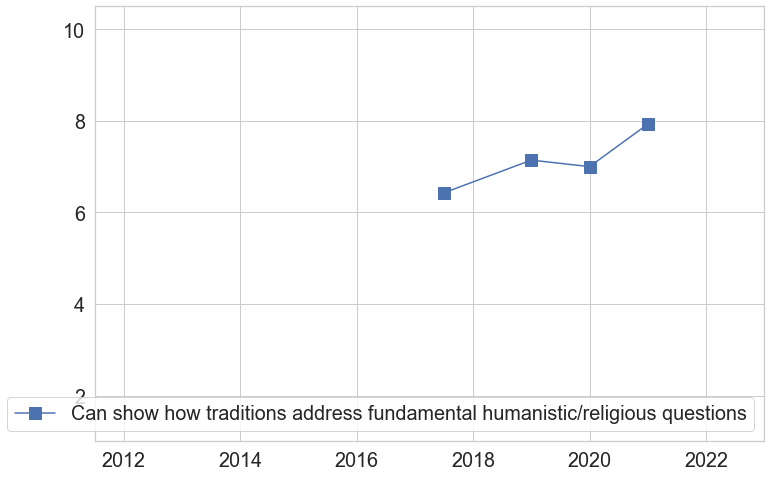

58 Course allowed exploration of social justice concepts
[2017.5 2019.  2020.  2021. ]


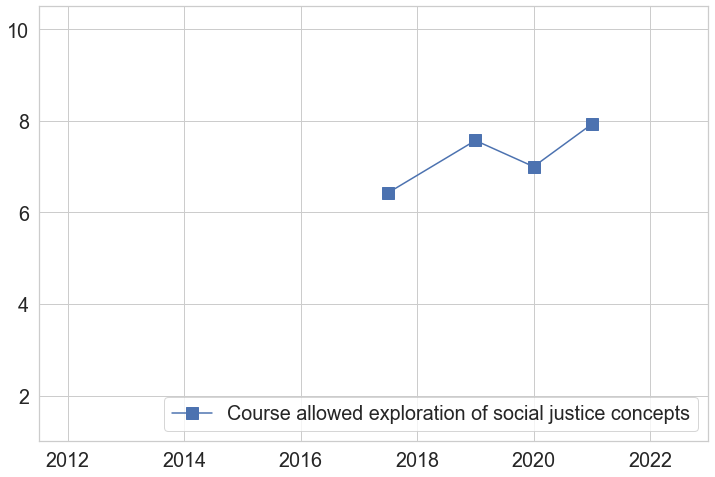

59 Can apply social justice principles to learn extent they are unrealized
[2017.5 2019.  2020.  2021. ]


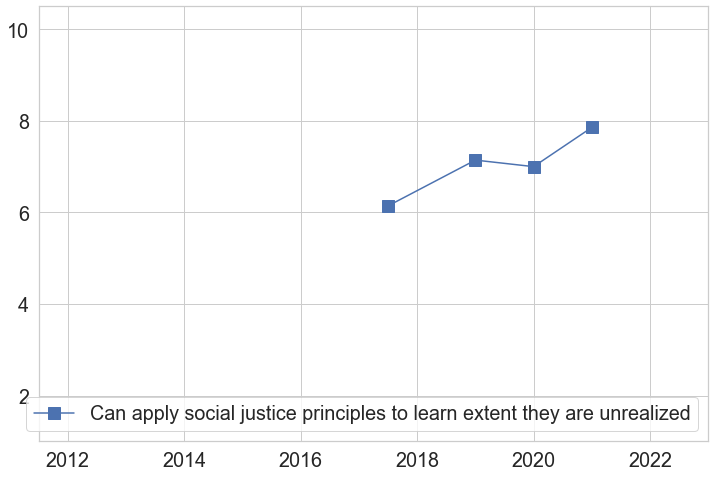

60 Can recognize underlying factors in social injustice
[2017.5 2019.  2020.  2021. ]


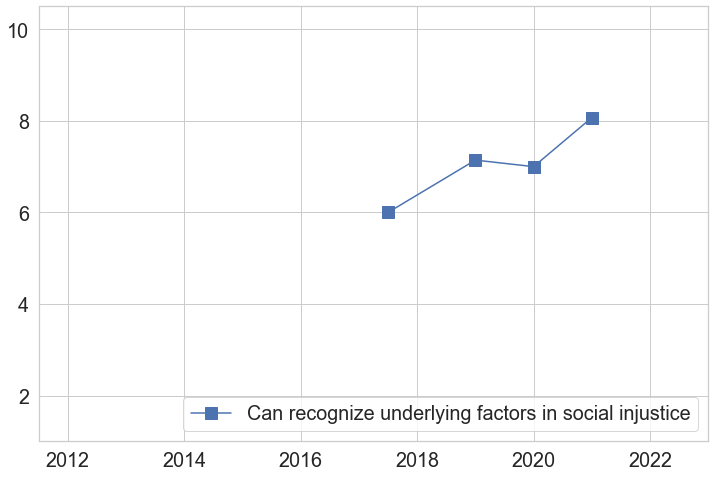

In [191]:
i1, i2 = 11, 12 # 72
i1, i2 = 11, 72
for ii, (col, label) in enumerate(zip(df.columns[i1:i2], df.columns[i1:i2])):
    print(ii, col)
    I = ~np.isnan(df[col])
    #print(df[['date', 'Dept', 'Num']][I])
    dates, means = [], []
    for date in set(df['date'][I].values):
        J = date == df['date'][I]
        means.append(np.mean(df[col][I][J]))
        dates.append(date)
    means = np.hstack(means)
    dates = np.hstack(dates)
    srt = np.argsort(dates)
    means = means[srt]
    dates = dates[srt]
    
    print(dates)
    
    fig, ax = plt.subplots(figsize=(12, 8))
    ax.plot(dates, means, marker='s', ms=12, label=label)
    ax.set_ylim(1, 10.5)
    ax.set_xlim(2011.5, 2023)
    ax.legend(loc='lower right')
    plt.show()

Knowledge of subject [0 1 2 3 4 5 6 7 8 9] [] (0.7950980392156863, 0.2009803921568627, 0.20686274509803904)
enthusiasm [ 0  1  2  3  4  5  6  7  8  9 10 11] [12 13 14 15 16 17] (0.2789215686274509, 0.48774509803921573, 0.6583333333333334)
available [ 0  1  2  3  4  5  6  7  8  9 10 11] [12 13 14 15 16 17] (0.3485294117647059, 0.636764705882353, 0.3397058823529412)
Instructor cares [0 1 2 3 4 5 6 7 8 9] [] (0.5651960784313728, 0.3475490196078431, 0.5975490196078431)
Instructor rating [0 1 2 3 4 5 6 7 8 9] [] (0.875, 0.4985294117647059, 0.125)
Instructor created respectful atmosphere [0 1 2] [3 4 5 6 7 8] (0.9, 0.9000000000000001, 0.2999999999999998)


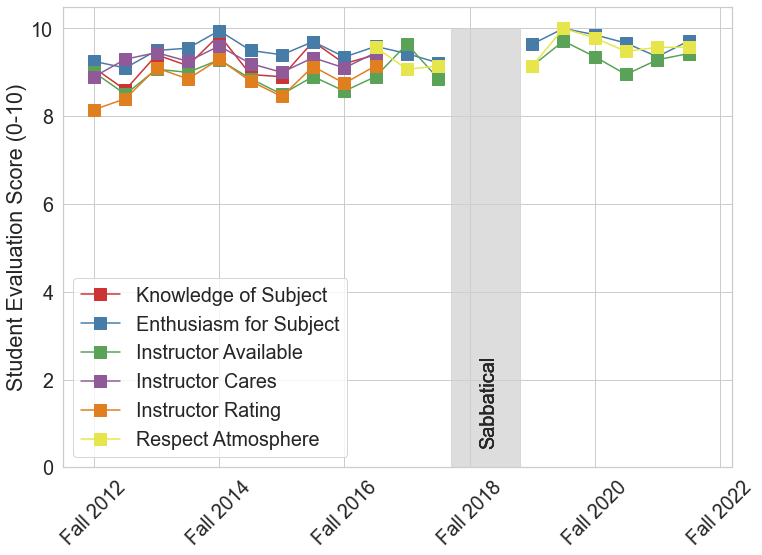

In [216]:
colors = iter(sns.color_palette('Set1', n_colors=14, desat=0.75))

fig, ax = plt.subplots(figsize=(12, 8))
for ii, (col, label) in enumerate(zip([
    #'Explanations of complex concepts', 
    'Knowledge of subject',
    'enthusiasm',
    'available',
    'Instructor cares',
    #'Course rating',
    'Instructor rating',
    'Instructor created respectful atmosphere',
    #'Instructor communicated clearly',
    ], [
    #'Complex',
    'Knowledge of Subject',
    'Enthusiasm for Subject',
    'Instructor Available',
    'Instructor Cares',
    #'Course Rating',
    'Instructor Rating',
    'Respect Atmosphere',
    #'Communicated',
    ])):
    
    #if ii != 3:
    #    continue

    I = ~np.isnan(df[col])
    #print(col, np.sum(I))
    
    #print(df[['date', 'Dept', 'Num']][I])
    dates, means = [], []
    for date in set(df['date'][I].values):
        J = date == df['date'][I]
        means.append(np.mean(df[col][I][J]))
        dates.append(date)
        
    means = np.hstack(means)
    dates = np.hstack(dates)
    
    srt = np.argsort(dates)
    means = means[srt]
    dates = dates[srt]
    
    color = next(colors)

    if False:
        ax.plot(dates, means, marker='s', ms=12, color=color)
        ax.plot(dates, means, marker='s', ms=12, label=label, color=color)
    else:
        pre = np.where(dates < 2018)[0]
        pst = np.where(dates >= 2019)[0]
        
        print(col, pre, pst, color)
        if len(pre) > 0 and len(pst) > 0:
            ax.plot(dates[pre], means[pre], marker='s', ms=12, color=color)
            ax.plot(dates[pst], means[pst], marker='s', ms=12, label=label, color=color)
        if len(pre) > 0 and len(pst) == 0:
            ax.plot(dates[pre], means[pre], marker='s', ms=12, label=label, color=color)
        if len(pre) == 0 and len(pst) > 0:
            ax.plot(dates[pst], means[pst], marker='s', ms=12, label=label, color=color)
        
        ax.fill_between([2017.7,2018.8], [10, 10], color='lightgray', alpha=0.2)
        ax.text(2018.15, 1.5, 'Sabbatical', ha='left', va='center',
                rotation=90, fontsize=20, alpha=0.6)

ax.set_ylim(0, 10.5)
ax.set_xlim(2011.5, 2022.2)
ax.set_ylabel('Student Evaluation Score (0-10)')
#ax.set_xlabel('Semester')

ax.xaxis.set_major_locator(ticker.MultipleLocator(2))
loc = ax.get_xticks().tolist()
ax.xaxis.set_major_locator(ticker.FixedLocator(loc))
ax.set_xticklabels(['', 'Fall 2012', 'Fall 2014', 'Fall 2016', 'Fall 2018', 'Fall 2020', 'Fall 2022', ''], rotation=45)
#ax.set_xticklabels(['', 'Fall 2012', 'Spring 2013', 'Fall 2014', 'Fall 2016', 'Fall 2018', 'Fall 2020', 'Fall 2022', ''], rotation=45)
ax.legend(loc='lower left')

fig.subplots_adjust(top=0.95, bottom=0.15)
fig.savefig('student-evaluations-trends.png', facecolor='white')